In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('./datasets/hitters.csv')

In [4]:
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [105]:
data.shape

(322, 20)

In [85]:
data.isna().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [87]:
(data['League'] == data['NewLeague']).sum()

303

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [88]:
x = data.drop(['League', 'Division', 'Salary', 'NewLeague'], axis=1)

In [89]:
x.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4


In [90]:
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [91]:
x_scaled

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,-0.574071,-0.755130,-1.123591,-0.804734,-0.728308,-1.145172,-1.310194,-1.015121,-0.997117,-0.795183,-0.985636,-0.905069,-0.923478,0.560399,-0.540924,1.880899
1,-0.430437,-0.431732,-0.433579,-1.035649,-0.383827,0.011930,1.332925,0.344876,0.179704,-0.005697,-0.113299,0.252124,0.430391,1.224048,-0.467740,0.308192
2,0.640293,0.624699,0.831443,0.580752,0.917547,1.724442,-0.903560,-0.441561,-0.398759,-0.075357,-0.404078,-0.192719,0.010354,2.108915,-0.182323,0.937275
3,0.751283,0.861858,1.061447,0.542266,1.147201,-0.080638,0.722974,1.283860,1.312145,1.805477,1.406546,1.526538,0.351634,-0.317331,-0.701928,-0.792703
4,-0.391264,-0.302373,-0.088573,-0.458363,-0.230724,-0.404626,-1.106877,-0.970736,-0.943555,-0.667472,-0.931677,-0.853972,-0.852222,1.841314,-0.489695,-0.635432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.757812,0.560020,-0.433579,0.542266,-0.001070,-0.080638,-0.496927,0.023406,0.135325,-0.435270,0.060569,-0.057463,-0.458437,0.128670,-0.716565,-0.792703
318,0.725167,0.754058,-0.663583,0.965609,0.075482,2.557555,0.926291,1.233441,1.214204,-0.353999,1.613389,0.363334,2.305557,0.085854,2.005873,1.880899
319,0.614177,0.538460,-0.893587,0.388323,-0.192448,0.613623,-0.293610,-0.408811,-0.435487,-0.725522,-0.425062,-0.712704,-0.428435,-0.898917,0.044547,-0.163620
320,1.254003,0.926537,-0.203575,1.311981,0.458239,1.817010,0.113024,0.236714,0.213371,0.319386,0.333362,0.270158,0.269127,3.657430,0.176278,0.622733


In [95]:
pca = PCA(0.95)

In [96]:
pca.fit(x_scaled)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [97]:
pca.explained_variance_ratio_

array([0.46037855, 0.26039849, 0.1033886 , 0.05369021, 0.04207841,
       0.02963591, 0.01570791])

In [98]:
np.sum(pca.explained_variance_ratio_)

0.9652780888388013

In [99]:
x_pca = pca.transform(x_scaled)

In [100]:
print(x_scaled.shape)
print(x_pca.shape)

(322, 16)
(322, 7)


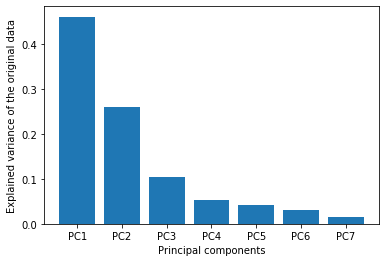

In [119]:
plt.bar(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('Principal components')
plt.ylabel('Explained variance of the original data')
plt.xticks(ticks=range(0, len(pca.explained_variance_ratio_)),
                       labels=['PC{}'.format(x) for x in range(1, len(pca.explained_variance_ratio_) + 1)])
plt.show()